In [1]:
# Bibliotheken abrufen
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# URL als Variable definieren
url = "https://rodare.hzdr.de/api/records/?page=1&sort=mostrecent&size=1000"

In [3]:
# Funktion um Inhalt aus URL in r zu speichern
r = requests.get(url)

In [4]:
# JSON lesen lassen
json = r.json()

In [5]:
# Dictionary anlegen und Keys der gewünschten Werte definieren
Meta_dict = {}
Meta_dict['type'] = []
Meta_dict['license'] = []
Meta_dict['rel_id'] = []
Meta_dict['pub_date'] = []
Meta_dict['Access_Right'] = []
Meta_dict['Downloads'] = []
Meta_dict['unique_downloads'] = []
Meta_dict['unique_views'] = []
Meta_dict['views'] = []
Meta_dict['isreferencedby'] = []
Meta_dict['doi'] = []

In [6]:
# Definition einer Teilliste und for-Schleife, um den type der Records aus allen Einträgen auszulesen und aufzulisten
for record in json['hits']['hits']:
    Meta_dict['type'].append(record['metadata']['resource_type']['type'])
    if 'license' in record['metadata'].keys():
        Meta_dict['license'].append(record['metadata']['license']['id'])
    else:
        Meta_dict['license'].append('NaN')
# Neue Iteration in Liste der related identifier anlegen und dort die Bedigungen für das Auslesen definieren
    count_id = 0
    counter_2 = 0
    for identifier in record['metadata']['related_identifiers']:
        #print(identifier['relation'])
        if identifier['relation'] == 'isReferencedBy' and 'hzdr' in identifier['identifier']:
            count_id = count_id + 1
        if identifier['relation'] == 'isReferencedBy':
            counter_2 = counter_2 + 1
        #print(counter_2)
    Meta_dict['isreferencedby'].append(counter_2)
    Meta_dict['rel_id'].append(count_id)
    Meta_dict['pub_date'].append(record['created'][:10])
    Meta_dict['Access_Right'].append(record['metadata']['access_right'])
    Meta_dict['Downloads'].append(int(record['stats']['downloads']))
    Meta_dict['unique_downloads'].append(int(record['stats']['unique_downloads']))
    Meta_dict['unique_views'].append(int(record['stats']['unique_views']))
    Meta_dict['views'].append(int(record['stats']['views']))
    Meta_dict['doi'].append(record['links']['doi'])

In [7]:
# https://datatofish.com/select-rows-pandas-dataframe/

In [8]:
#for record in json['hits']['hits']:
#    counter_2 = 0
#    for identifier in record['metadata']['related_identifiers']:
#        if identifier['relation'] == 'isReferencedBy':
#            counter_2 = counter_2 + 1
#    Meta_dict['isreferencedby'].append(counter_2)

In [9]:
sum(Meta_dict['isreferencedby'])

168

In [10]:
# Umwandlung des Disctionaries in ein DataFrame 
df = pd.DataFrame(Meta_dict)

In [11]:
sum(df.isreferencedby == 1)

162

In [12]:
sum(df.isreferencedby > 1)

3

In [13]:
sum(df.type == 'dataset')

207

In [14]:
df

,type,license,rel_id,pub_date,Access_Right,Downloads,unique_downloads,unique_views,views,isreferencedby,doi
0,dataset,CC-BY-4.0,1,2021-08-12,open,0,0,3,3,1,https://doi.org/10.14278/rodare.1111
1,dataset,CC-BY-4.0,1,2021-08-09,open,2,2,14,19,1,https://doi.org/10.14278/rodare.1098
2,dataset,CC-BY-4.0,0,2021-08-09,open,0,0,5,5,0,https://doi.org/10.14278/rodare.1105
3,software,LGPL-3.0,0,2021-08-06,open,0,0,22,31,0,https://doi.org/10.14278/rodare.1103
4,dataset,NaN,1,2021-08-06,restricted,0,0,4,4,1,https://doi.org/10.14278/rodare.1093
...,...,...,...,...,...,...,...,...,...,...,...
265,dataset,CC-BY-SA-4.0,0,2018-05-09,open,23,22,340,402,0,https://doi.org/10.14278/rodare.24
266,dataset,CC-BY-4.0,0,2018-04-25,open,90,33,349,423,0,https://doi.org/10.14278/rodare.16
267,dataset,CC-BY-4.0,0,2018-04-12,open,23,18,287,344,0,https://doi.org/10.14278/rodare.8
268,dataset,NaN,0,2018-03-20,restricted,0,0,257,290,0,https://doi.org/10.14278/rodare.4


In [15]:
# https://www.python-lernen.de/python-modul-datetime.htm
from datetime import date
aktuellesDatum = date.today()
rodare_pub = date(2018,2,28)
zeitraum = aktuellesDatum - rodare_pub
print("Es sind", zeitraum.days, "Tage seit der Inbetriebnahme von RODARE vergangen")
zr = zeitraum.days
ds = zr/len(df)
lpd = df['Downloads'].sum()/zr

Es sind 1263 Tage seit der Inbetriebnahme von RODARE vergangen


In [16]:
print('Stand ('+ aktuellesDatum.strftime("%d.%m.%Y") +\
      ') - Seit Inbetriebnahme von RODARE wurden aus der Gesamtheit von ' + str(len(df)) \
      + ' Records ' + str(df['Downloads'].sum()) + ' Downloads getätigt.')

Stand (14.08.2021) - Seit Inbetriebnahme von RODARE wurden aus der Gesamtheit von 270 Records 18920 Downloads getätigt.


In [17]:
print('Seit der Inbetriebnahme von RODARE sind', zeitraum.days , 
      'Tage vergangen. \nDas entspricht eine Veröffentlichung alle', round(ds,1) ,
      'Tage und' ,round(lpd,1), 'Downloads pro Tag.')

Seit der Inbetriebnahme von RODARE sind 1263 Tage vergangen. 
Das entspricht eine Veröffentlichung alle 4.7 Tage und 15.0 Downloads pro Tag.


In [18]:
df.describe(include='all')

,type,license,rel_id,pub_date,Access_Right,Downloads,unique_downloads,unique_views,views,isreferencedby,doi
count,270,270,270.000000,270,270,270.000000,270.000000,270.000000,270.000000,270.000000,270
unique,6,10,NaN,177,4,NaN,NaN,NaN,NaN,NaN,270
top,dataset,CC-BY-4.0,NaN,2021-03-10,open,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.14278/rodare.656
freq,207,125,NaN,18,153,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,0.614815,NaN,NaN,70.074074,26.570370,97.144444,140.344444,0.622222,NaN
std,NaN,NaN,0.495109,NaN,NaN,240.290473,73.376915,101.609270,128.874668,0.508174,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,3.000000,3.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,40.250000,63.000000,0.000000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,5.000000,4.000000,68.000000,107.000000,1.000000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,37.000000,20.000000,102.500000,160.000000,1.000000,NaN


In [19]:
df.shape

(270, 11)

In [20]:
# sorted_df = df.sort_values(by='publication_date', ascending=False)
# print(sorted_df)

In [21]:
# df['publication_date'] >= '2021-01-01'

In [27]:
# zurück kommt boolarray
start = list(df['pub_date'] >= '2021-01-01')
end = list(df['pub_date'] <= '2021-03-31')
date_filter = np.all(np.array([start,end]),axis=0)
#end
date_filter

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
# zurück kommt boolarray
df['pub_date'].all(df['pub_date'] >= '2021-01-01',df['pub_date'] <= '2021-03-31')

In [ ]:
#sortet_list = list(df['publication_date'][df['publication_date'] >= '2021-01-01'])
#sortet_list

In [ ]:
#sortet_list.sort()
#sortet_list

In [ ]:
#list(df['publication_date'][df['publication_date'] >= '2021-01-01']).sort()

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
len(df)

In [ ]:
df['type'].value_counts()

In [ ]:
df['type'].value_counts(normalize=True)

In [ ]:
type_mode = df['type'].mode()
type_mode[0]

In [26]:
df['rel_id'].isna().sum()

0

In [ ]:
df['Downloads'].mean()

In [ ]:
df['Downloads'].median()

In [ ]:
df['Downloads'].var()

In [ ]:
df['Downloads'].std()

In [23]:
df['Downloads'].max()

2216

In [28]:
# https://www.it-swarm.com.de/de/python/ermitteln-sie-den-maximalen-wert-einer-spalte-und-geben-sie-die-entsprechenden-zeilenwerte-mit-pandas-zurueck/1072494383/
print(df[['doi']][df.Downloads == df.Downloads.max()])

                                    doi
51  https://doi.org/10.14278/rodare.915


In [ ]:
df['Downloads'].min()

In [ ]:
df['Downloads'].corr(df['views'])

In [ ]:
df['views'].mean()

In [ ]:
df['views'].median()

In [ ]:
# Nur den Mittelwert etc. eines bestimmten Zetabschnittes errechnen lassen?
# Wie eine Printausgabe in eine Datei schreiben lassen bei Ausführung des Programmes?

In [ ]:
sns.relplot(x='type', y='license', data=df)

In [ ]:
#plt.savefig('../type_license.png', dpi=150)

In [ ]:
sns.relplot(y='type', x='Downloads', data=df)

In [ ]:
sns.relplot(y='type', x='views', data=df)

In [ ]:
#Problem: Wie kann ich hier nur bestimmte Daten zb 2021 in die Darstellung einbringen?
sns.relplot(x='pub_date', y='type', 
            size='Downloads',
            #row='license', 
            #col='license', 
            data=df,
            height=5, aspect=3)

In [ ]:
sns.catplot(x='publication_date',
            data=df, kind='count', color="steelblue", height=5, aspect=3)

In [ ]:
plt.plot(df['pub_date'][df['pub_date'] >= '2021-06-01'], df['views'][df['pub_date'] >= '2021-06-01'], color='#4870a0', marker='o')

In [ ]:
plt.plot(df['publication_date'][date_filter], df['views'][date_filter], color='#4870a0', marker='o')

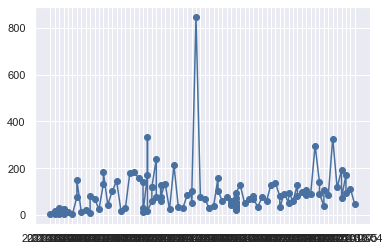

In [25]:
start_date = '2021-01-01'
plt.plot(df['pub_date'][df['pub_date'] >= start_date], df['views'][df['pub_date'] >= start_date], color='#4870a0', marker='o')

In [ ]:
plt.stackplot(df['pub_date'], 
              df['unique_views'], 
              df['views'],
              alpha=0.75,
              colors=['#7289da','#f29fa9'],
              labels=['unique_views', 'views'])